# Y.Afisha

## Pendahuluan

### Untuk dapat memberikan pedoman dimana bisa mengoptimalkan anggaran biaya pemasaran, pada saat magang di departemen analitik dengan mempelajari 
* User menggunakan produk Y.Afisha
* Kapan user melakukan pembelian
* Jumlah uang yang di keluarkan oleh user
* Kapan biaya pemasaran terbayarkan

## Rincian Penelitian
### Di berikan data Log yang mencatata kunjungan pada server dari januari 2017 sampai desember 2018¶

## Analisis Eksplorasi

### Melakukan import dataset library

In [7]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')


In [8]:
d1_costs = pd.read_csv('costs_us.csv')
d2_orders =  pd.read_csv('orders_log_us.csv')
d3_visits = pd.read_csv('visits_log_us.csv')

In [9]:
d1_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [10]:
d2_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
d3_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [12]:
d3_visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
d2_orders.columns = ['buy_ts', 'revenue', 'uid']

### Melakukan pengecekan informasi tipe data

In [13]:
number = 1
for dataset in d1_costs, d2_orders, d3_visits:
    print(f'\ndata sample for d{number}_')
    print(dataset.info())
    number += 1


data sample for d1_
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

data sample for d2_
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

data sample for d3_
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   de

### Pengecekan missing value

In [15]:
number = 1
for dataset in d1_costs, d2_orders, d3_visits:
    print(f'\ndata sample for d{number}_')
    print(dataset.isna().sum() / len(dataset) * 100)
    number += 1


data sample for d1_
source_id    0.0
dt           0.0
costs        0.0
dtype: float64

data sample for d2_
buy_ts     0.0
revenue    0.0
uid        0.0
dtype: float64

data sample for d3_
device       0.0
end_ts       0.0
source_id    0.0
start_ts     0.0
uid          0.0
dtype: float64


### Pengecekan duplikat data

In [16]:
number = 1
for dataset in d1_costs, d2_orders, d3_visits:
    print(f'\ndata sample for da_{number}')
    print(dataset.duplicated(keep = False).sum())
    number += 1


data sample for da_1
0

data sample for da_2
0

data sample for da_3
0


* Kesimpulan awal
1. Tidak ada duplikat atau missing value dari data yang di sediakan 

## Melakukan penyesuaian data visits, untuk mempermudah proses analisis

### Penambahan kolom date 

In [17]:
d3_visits['date'] = pd.to_datetime(d3_visits['start_ts'])
d3_visits['date'] = d3_visits['date'].dt.to_period("D")
d3_visits.head()

,device,end_ts,source_id,start_ts,uid,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27


### Penambahan kolom dow (day of week)

In [18]:
d3_visits['dow'] = d3_visits['date'].dt.dayofweek
d3_visits.head()

,device,end_ts,source_id,start_ts,uid,date,dow
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,6
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2


In [19]:
d3_visits.sample(frac=0.2)

,device,end_ts,source_id,start_ts,uid,date,dow
107057,desktop,2018-02-17 19:27:00,3,2018-02-17 18:56:00,12363888161941427794,2018-02-17,5
244818,desktop,2018-04-17 10:45:00,4,2018-04-17 10:30:00,8355554752291295122,2018-04-17,1
101014,desktop,2017-06-15 16:10:00,1,2017-06-15 16:05:00,15250286877235012854,2017-06-15,3
218359,desktop,2018-02-19 20:38:00,4,2018-02-19 19:57:00,17775570758253949302,2018-02-19,0
325605,desktop,2017-10-24 00:32:00,5,2017-10-24 00:29:00,3260371761796360907,2017-10-24,1
...,...,...,...,...,...,...,...
135079,desktop,2017-10-23 07:14:00,4,2017-10-23 07:11:00,11853988206707508615,2017-10-23,0
110751,desktop,2018-03-22 19:52:00,4,2018-03-22 19:37:00,16744375326502377731,2018-03-22,3
330058,desktop,2018-01-03 15:13:00,3,2018-01-03 15:03:00,16677865551527367417,2018-01-03,2
133762,touch,2017-06-02 10:00:00,1,2017-06-02 09:43:00,6534342594850563132,2017-06-02,4


## Melakukan analisis terhadap penggunaan situs Y.Afisha

### Penggunaan yang di lakukan user per harinya

In [24]:
daily_use = pd.pivot_table(d3_visits, index='date', values='uid', aggfunc='count').reset_index()
daily_use['date'] = daily_use['date'].astype(str)

In [25]:
daily_use.head(10)

,date,uid
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
5,2017-06-06,875
6,2017-06-07,788
7,2017-06-08,939
8,2017-06-09,755
9,2017-06-10,375


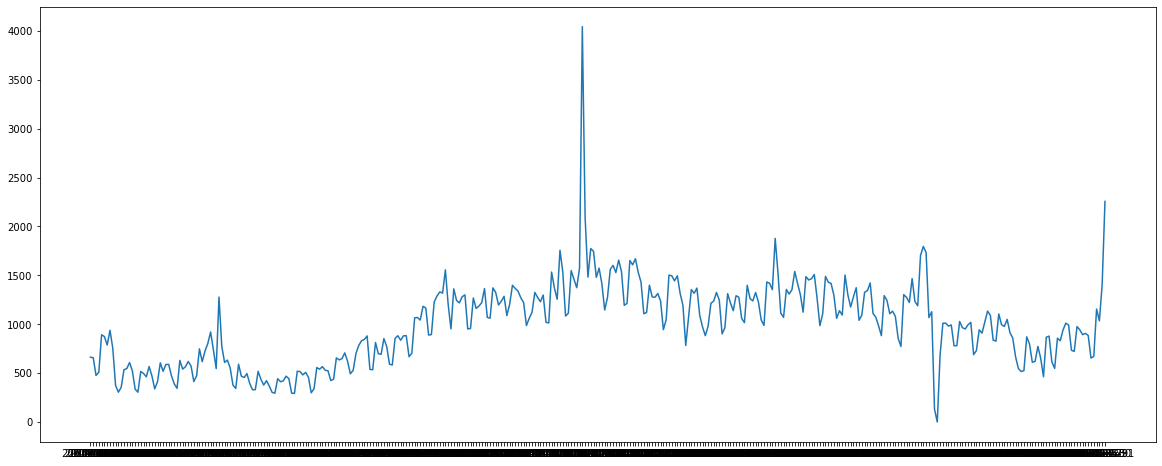

In [26]:
plt.figure(figsize=(20, 8))
plt.plot(daily_use['date'], daily_use['uid'])
plt.show()

In [27]:
daily_use.describe()

,uid
count,364.000000
mean,987.362637
std,418.994796
min,1.000000
25%,635.500000
50%,1003.000000
75%,1280.000000
max,4042.000000


### Kesimpulan awal 2
- Jika di perhatikan dari plot semenjak januari 2017 terdapat 3 anomali yang bisa di perhatikan lebih lanjut
1. Ada peningkatan pesat, mungkin terdapat promo 
2. ada penurunan pesat, mungkin kalah promo dari pesaing
3. Ada peningkatan pada ahir tahun. biasanya promo ahir tahun
4. User secara stabil dan terus meningkat sampai ahir 2018 jika dilihat dari plot

### Dari sini sebaiknya mencari tahu penggunaan situs Y.Afisha oleh user setiap harinya, dimana biasanya ada yang lebih dari satu kali

In [28]:
user_daily_use = pd.pivot_table(d3_visits, index=['date', 'uid'], values='device', aggfunc='count').reset_index()

In [29]:
user_daily_use.head()

,date,uid,device
0,2017-06-01,32197920403662046,1
1,2017-06-01,184148767273119549,2
2,2017-06-01,254239507810036143,1
3,2017-06-01,258099436367309303,1
4,2017-06-01,300776506671194537,1


In [30]:
user_daily_use.describe()

,uid,device
count,3.305090e+05,330509.000000
mean,9.194815e+18,1.087414
std,5.306446e+18,0.371823
min,1.186350e+13,1.000000
25%,4.601758e+18,1.000000
50%,9.207875e+18,1.000000
75%,1.375599e+19,1.000000
max,1.844668e+19,10.000000


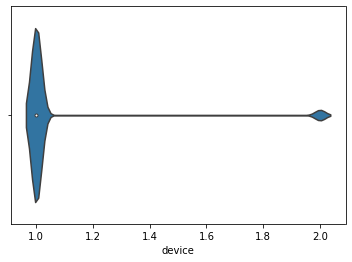

In [31]:
sns.violinplot(data=user_daily_use.loc[user_daily_use.device < 3], x='device')
plt.show()

In [32]:
user_daily_use.groupby('device').count()['uid'].reset_index()

,device,uid
0,1,307937
1,2,18323
2,3,2962
3,4,814
4,5,281
5,6,121
6,7,39
7,8,19
8,9,11
9,10,2


* Kesimpulan awal 3

1. Hal ini di lakukan mencari tahu apakah user sering membuka situs Y ashifa 
2. Dari data yang sudah di visualisasi user setiap hari biasanya membuka situs 1 kali 
3. Kemungkinan user selalu melakukan pengecekan produk Y.Ashifa setiap harinya 


### Melakukan eksplorasi berapa banyak waktu yang di luangkan user pada saat mengunjungi situs 

In [33]:
d3_visits['start_ts'] = pd.to_datetime(
    d3_visits['start_ts'], format="%Y-%m-%d %H:%M"
)
d3_visits['end_ts'] = pd.to_datetime(
    d3_visits['end_ts'], format="%Y-%m-%d %H:%M"
)
d3_visits['session_duration_sec'] = (
    d3_visits['end_ts'] - d3_visits['start_ts']
).dt.seconds 

d3_visits.head()

,device,end_ts,source_id,start_ts,uid,date,dow,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,0,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,5,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,6,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2,0


<AxesSubplot:>

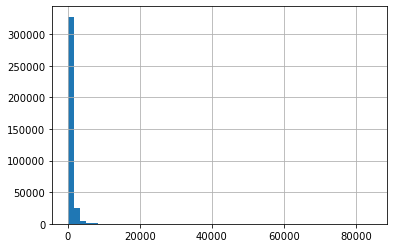

In [34]:
d3_visits['session_duration_sec'].hist(bins=50)

In [35]:
d3_visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

* Kesimpulan awal 4
1. Jika di lihat dari histogram kebanyakan user menghabiskan 16 menit 
2. Dengan rata rata keseluruhan user mengabiskan 10 menit 

## Jumlah user mengunjungi situs setiap hari, minggu, dan bulan 

### Melakukan pengelompokan kolom hari , minggu, bulan

In [36]:
d3_visits['daily']= d3_visits['start_ts'].astype('datetime64[D]')
d3_visits['weekly']= d3_visits['start_ts'].astype('datetime64[W]')
d3_visits['monthly']= d3_visits['start_ts'].astype('datetime64[M]')
d3_visits['yearly']= d3_visits['start_ts'].astype('datetime64[Y]')
d3_visits.head()

,device,end_ts,source_id,start_ts,uid,date,dow,session_duration_sec,daily,weekly,monthly,yearly
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,0,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,5,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,6,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2,0,2017-12-27,2017-12-21,2017-12-01,2017-01-01


### Kunjungan site setiap harinya

In [37]:
group_visit = d3_visits.groupby('daily').agg({'uid' : 'nunique'}).reset_index()
group_visit


,daily,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


In [38]:
group_visit_device = d3_visits.groupby(['device', 'daily']).agg({'uid' : 'nunique'}).reset_index()
group_visit_device

,device,daily,uid
0,desktop,2017-06-01,455
1,desktop,2017-06-02,458
2,desktop,2017-06-03,307
3,desktop,2017-06-04,326
4,desktop,2017-06-05,631
...,...,...,...
722,touch,2018-05-27,236
723,touch,2018-05-28,303
724,touch,2018-05-29,263
725,touch,2018-05-30,393


In [39]:
group_visit['date_cum']= group_visit['daily']
group_visit_device['date_cum']= group_visit_device['daily']
group_visit


,daily,uid,date_cum
0,2017-06-01,605,2017-06-01
1,2017-06-02,608,2017-06-02
2,2017-06-03,445,2017-06-03
3,2017-06-04,476,2017-06-04
4,2017-06-05,820,2017-06-05
...,...,...,...
359,2018-05-27,620,2018-05-27
360,2018-05-28,1039,2018-05-28
361,2018-05-29,948,2018-05-29
362,2018-05-30,1289,2018-05-30


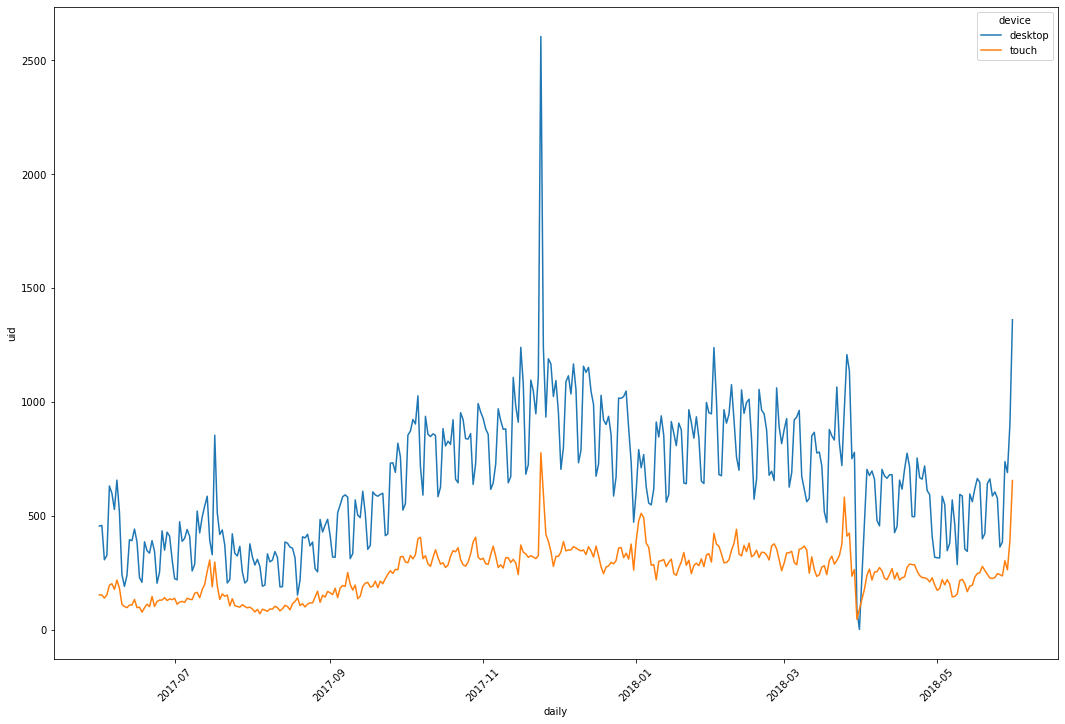

In [40]:
plt.figure(figsize=(18,12))
sns.lineplot(data=group_visit_device, x='daily', y='uid', hue='device')
plt.xticks(rotation= 45)
plt.show()

* Kesimpulan awal 5
1. Jika di lihat dari grafik line bisa di lihat pengguna desktop jauh lebih banyak dari pengguna touch
2. Bisa di lihat adanya penurunan penguna desktop di hari hari tertentu

In [41]:
used_avg_day= d3_visits.groupby('daily').agg({'uid' : 'nunique'}).mean()
print('Berlabuhnya user perharinya:', int(used_avg_day),'users')

Berlabuhnya user perharinya: 907 users


In [42]:
used_avg_week = d3_visits.groupby('weekly').agg({'uid' : 'nunique'}).mean()
print('Berlabuhnya user jika di hitung perminggu:', int(used_avg_week),'users')

Berlabuhnya user jika di hitung perminggu: 5724 users


In [43]:
used_avg_month = d3_visits.groupby('monthly').agg({'uid' : 'nunique'}).mean()
print('Berlabuhnya user jika di hitung perbulan:', int(used_avg_month),'users')

Berlabuhnya user jika di hitung perbulan: 23228 users


### Membuat fungsi untuk melihat matrik kunjungan user setiap hari berdasarkan bulannya 

In [44]:
user_dm = {}

for month, d in d3_visits.groupby('monthly'):
    key = month.strftime('%Y-%m')
    value = d.groupby('daily').agg({'uid': 'nunique'}).mean()
    user_dm[key] = int(value)

In [45]:
user_dm

{'2017-06': 510,
 '2017-07': 532,
 '2017-08': 433,
 '2017-09': 739,
 '2017-10': 1133,
 '2017-11': 1328,
 '2017-12': 1240,
 '2018-01': 1096,
 '2018-02': 1217,
 '2018-03': 1052,
 '2018-04': 845,
 '2018-05': 786}

In [46]:
data = user_dm

df_dau_monthly = pd.DataFrame.from_dict([data])
df_dau_monthly

,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
0,510,532,433,739,1133,1328,1240,1096,1217,1052,845,786


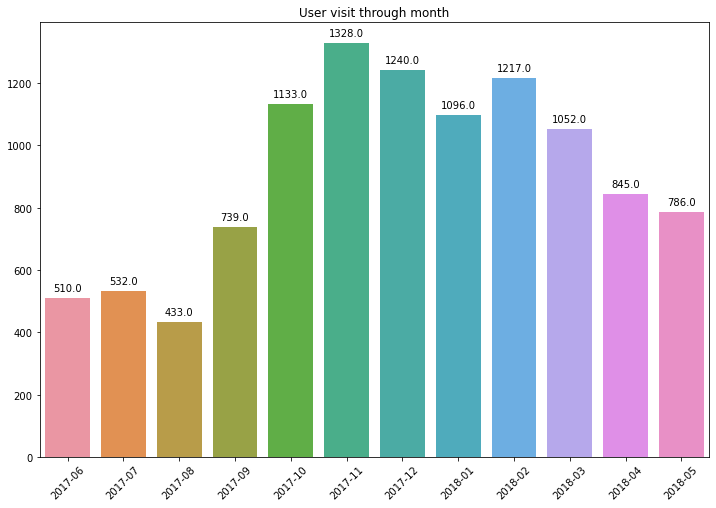

In [47]:
# Visualisasi datanya

plt.figure(figsize=(12,8))
splot = sns.barplot(data=df_dau_monthly)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.title('User visit through month')
plt.show();

* Kesimpulan awal 6
1. Pengguna per hari 907 users
2. per minggu 5724 users
3. per bulan 23228 users
4. Bulan november paling banyak kunjungan ke website Y.ashifa

### Melakukan analisis retensi user menggunakan produk Y.Ashifa

In [48]:
d3_visits

,device,end_ts,source_id,start_ts,uid,date,dow,session_duration_sec,daily,weekly,monthly,yearly
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,0,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,5,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,6,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2,0,2017-12-27,2017-12-21,2017-12-01,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,5,19,2017-07-29,2017-07-27,2017-07-01,2017-01-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,3,19,2018-01-25,2018-01-25,2018-01-01,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,5,19,2018-03-03,2018-03-01,2018-03-01,2018-01-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,3,19,2017-11-02,2017-11-02,2017-11-01,2017-01-01


In [49]:
# Mengetahui user pertama kali mengunjungi website

first_visits = d3_visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid','first_sess_start_ts']


In [50]:
# Membuat tabel sebagai fungsi untuk membagi kunjungan user per hari, minggu, dan bulan 

first_visits['first_sess_year'] = first_visits['first_sess_start_ts'].astype('datetime64[Y]')
first_visits['first_sess_month'] = first_visits['first_sess_start_ts'].astype('datetime64[M]')
first_visits['first_sess_week'] = first_visits['first_sess_start_ts'].astype('datetime64[W]')
first_visits['first_sess_date'] = first_visits['first_sess_start_ts'].astype('datetime64[D]')


In [51]:
# Melakukan penggabungan table berdasarkan table uid

visid = pd.merge(d3_visits, first_visits, on ='uid')
visid.head()

,device,end_ts,source_id,start_ts,uid,date,dow,session_duration_sec,daily,weekly,monthly,yearly,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01,2017-12-20 17:20:00,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,0,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01,2018-02-19 16:53:00,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,5,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01,2017-07-01 01:54:00,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,6,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01,2018-03-09 20:05:00,2018-01-01,2018-03-01,2018-03-08,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,4,1680,2018-03-09,2018-03-08,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-01-01,2018-03-01,2018-03-08,2018-03-09


In [52]:
# Melakukan kalkulasi hari dan bulan melalui sesi pertama ke sesi selanjutnya

visid['age_days'] = (visid['daily'] - visid['first_sess_date']).dt.days
visid['age_months'] = round(visid['age_days'] / 30,0).astype('int')

visid.head()

,device,end_ts,source_id,start_ts,uid,date,dow,session_duration_sec,daily,weekly,monthly,yearly,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date,age_days,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01,2017-12-20 17:20:00,2017-01-01,2017-12-01,2017-12-14,2017-12-20,0,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,0,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01,2018-02-19 16:53:00,2018-01-01,2018-02-01,2018-02-15,2018-02-19,0,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,5,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01,2017-07-01 01:54:00,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,6,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01,2018-03-09 20:05:00,2018-01-01,2018-03-01,2018-03-08,2018-03-09,72,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,4,1680,2018-03-09,2018-03-08,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-01-01,2018-03-01,2018-03-08,2018-03-09,0,0


### Melakukan cohort analisis

In [53]:
cohorts = visid.pivot_table(index='first_sess_month', columns='age_months', values='uid', aggfunc='nunique')

In [54]:
cohorts.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
first_sess_month,,,,,,,,,,,,,
2017-06-01,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07-01,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
2017-08-01,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
2017-09-01,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,
2017-10-01,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,,,,
2017-11-01,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,,,,,
2017-12-01,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,,,,,,
2018-01-01,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2018-02-01,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,


In [55]:
# Membuat fungsi untuk mengetahui retensi user yang kembali menggunakan product 

retention = pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, cohorts[col]/cohorts[0]*100], axis=1)
retention.columns = cohorts.columns

In [56]:
retention.head()

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
2017-06-01 00:00:00,100.0,7.202655,5.430274,5.845086,7.119692,6.388114,6.599291,5.377479,5.626367,4.970209,4.344219,3.86907,2.051437
2017-07-01 00:00:00,100.0,5.449011,5.235921,5.136986,5.837139,4.634703,4.611872,4.710807,4.010654,2.884323,2.564688,0.85997,NaN
2017-08-01 00:00:00,100.0,6.787153,6.227286,5.667420,5.372753,4.046754,4.302131,3.339554,2.936843,2.386799,0.569689,NaN,NaN
2017-09-01 00:00:00,100.0,7.417385,6.687021,4.885057,4.088841,3.843391,3.418343,2.514368,2.191092,0.365182,NaN,NaN,NaN
2017-10-01 00:00:00,100.0,7.152481,5.327790,3.695577,3.753320,3.029603,2.175001,1.840089,0.461947,NaN,NaN,NaN,NaN


In [57]:
retention.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
2017-06-01 00:00:00,100.0,7.202655,5.430274,5.845086,7.119692,6.388114,6.599291,5.377479,5.626367,4.970209,4.344219,3.86907,2.051437
2017-07-01 00:00:00,100.0,5.449011,5.235921,5.136986,5.837139,4.634703,4.611872,4.710807,4.010654,2.884323,2.564688,0.85997,
2017-08-01 00:00:00,100.0,6.787153,6.227286,5.66742,5.372753,4.046754,4.302131,3.339554,2.936843,2.386799,0.569689,,
2017-09-01 00:00:00,100.0,7.417385,6.687021,4.885057,4.088841,3.843391,3.418343,2.514368,2.191092,0.365182,,,
2017-10-01 00:00:00,100.0,7.152481,5.32779,3.695577,3.75332,3.029603,2.175001,1.840089,0.461947,,,,
2017-11-01 00:00:00,100.0,6.785819,4.660893,3.728714,3.302995,2.345126,1.908397,0.392689,,,,,
2017-12-01 00:00:00,100.0,4.974672,4.183157,2.845496,2.283521,1.58303,0.399715,,,,,,
2018-01-01 00:00:00,100.0,5.264321,3.66867,2.461987,1.860856,0.207744,,,,,,,
2018-02-01 00:00:00,100.0,4.680813,2.712078,1.833581,0.301843,,,,,,,,
2018-03-01 00:00:00,100.0,4.055564,2.588761,0.393414,,,,,,,,,


### Melakukan pengecekan rata rata user yang kembali setelah sebulan

In [58]:
retention[1].mean()

5.361100820922162

In [59]:
rett = retention.drop([0], axis=1)
rett.fillna('')

age_months,1,2,3,4,5,6,7,8,9,10,11,12
2017-06-01 00:00:00,7.202655,5.430274,5.845086,7.119692,6.388114,6.599291,5.377479,5.626367,4.970209,4.344219,3.86907,2.051437
2017-07-01 00:00:00,5.449011,5.235921,5.136986,5.837139,4.634703,4.611872,4.710807,4.010654,2.884323,2.564688,0.85997,
2017-08-01 00:00:00,6.787153,6.227286,5.66742,5.372753,4.046754,4.302131,3.339554,2.936843,2.386799,0.569689,,
2017-09-01 00:00:00,7.417385,6.687021,4.885057,4.088841,3.843391,3.418343,2.514368,2.191092,0.365182,,,
2017-10-01 00:00:00,7.152481,5.32779,3.695577,3.75332,3.029603,2.175001,1.840089,0.461947,,,,
2017-11-01 00:00:00,6.785819,4.660893,3.728714,3.302995,2.345126,1.908397,0.392689,,,,,
2017-12-01 00:00:00,4.974672,4.183157,2.845496,2.283521,1.58303,0.399715,,,,,,
2018-01-01 00:00:00,5.264321,3.66867,2.461987,1.860856,0.207744,,,,,,,
2018-02-01 00:00:00,4.680813,2.712078,1.833581,0.301843,,,,,,,,
2018-03-01 00:00:00,4.055564,2.588761,0.393414,,,,,,,,,


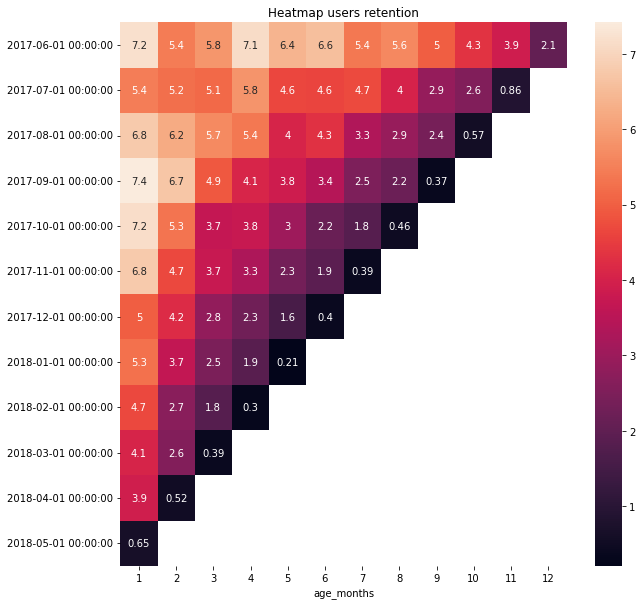

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(rett, annot=True)
plt.title('Heatmap users retention')
plt.show()

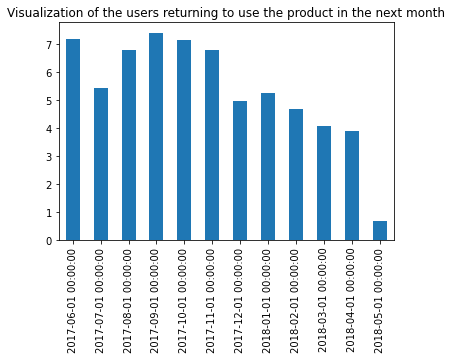

In [266]:
retention[1].plot(kind='bar')
plt.title('Visualization of the users returning to use the product in the next month');

In [267]:
cohorts.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
first_sess_month,,,,,,,,,,,,,
2017-06-01,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07-01,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
2017-08-01,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
2017-09-01,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,
2017-10-01,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,,,,
2017-11-01,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,,,,,
2017-12-01,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,,,,,,
2018-01-01,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2018-02-01,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,


* Kesimpulan awal 7
1. Rata rata user yang kembali setiap bulannya adalah 5 persen dan terjadi lonjakan pada bulan september sebesar 7.4 persen
2. dari total 100 persen pada 2017-06-01 ada 7.2 persen yang kembali menggunakan produk y.ashifa atau sebanyak 955 user dari 13259


## Melakukan analisis mengenai berapa banyak pendapatan Y.Afisha pada tahun 2017 - 2018

### User melakukan pembelian untuk pertama kali

In [268]:
d2_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [269]:
first_orders = d2_orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid','first_order_ts']

### Pembelian berdasarkan hari, minggu, bulan 

In [270]:
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')
first_orders['first_order_week'] = first_orders['first_order_ts'].astype('datetime64[W]')
first_orders['first_order_day'] = first_orders['first_order_ts'].astype('datetime64[D]')

first_orders.head()

,uid,first_order_ts,first_order_month,first_order_week,first_order_day
0,313578113262317,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03
2,2429014661409475,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11
3,2464366381792757,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24


In [271]:
# Pengecekan kembali tabel first_visits
first_visits.head()

,uid,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date
0,11863502262781,2018-03-01 17:27:00,2018-01-01,2018-03-01,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-01-01,2018-02-01,2018-02-01,2018-02-06
2,297729379853735,2017-06-07 18:47:00,2017-01-01,2017-06-01,2017-06-01,2017-06-07
3,313578113262317,2017-09-18 22:49:00,2017-01-01,2017-09-01,2017-09-14,2017-09-18
4,325320750514679,2017-09-30 14:29:00,2017-01-01,2017-09-01,2017-09-28,2017-09-30


In [272]:
# Penggabungan dataset dan di jadikan tabel baru
first_buy = pd.merge(first_visits, first_orders, on='uid')
first_buy.head()

,uid,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date,first_order_ts,first_order_month,first_order_week,first_order_day
0,313578113262317,2017-09-18 22:49:00,2017-01-01,2017-09-01,2017-09-14,2017-09-18,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-01-01,2017-06-01,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03
2,2429014661409475,2017-10-11 17:14:00,2017-01-01,2017-10-01,2017-10-05,2017-10-11,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-01,2018-01-25,2018-01-27,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-01-01,2017-11-01,2017-11-23,2017-11-24,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24


In [273]:
first_buy = pd.merge(first_visits, first_orders, on='uid')

first_buy.head()

,uid,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date,first_order_ts,first_order_month,first_order_week,first_order_day
0,313578113262317,2017-09-18 22:49:00,2017-01-01,2017-09-01,2017-09-14,2017-09-18,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-01-01,2017-06-01,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03
2,2429014661409475,2017-10-11 17:14:00,2017-01-01,2017-10-01,2017-10-05,2017-10-11,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-01,2018-01-25,2018-01-27,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-01-01,2017-11-01,2017-11-23,2017-11-24,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24


In [274]:
first_buy['days_to_first_pur'] = (first_buy['first_order_day'] - first_buy['first_sess_date']).dt.days

first_buy.head()

,uid,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date,first_order_ts,first_order_month,first_order_week,first_order_day,days_to_first_pur
0,313578113262317,2017-09-18 22:49:00,2017-01-01,2017-09-01,2017-09-14,2017-09-18,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03,107
1,1575281904278712,2017-06-03 10:13:00,2017-01-01,2017-06-01,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,0
2,2429014661409475,2017-10-11 17:14:00,2017-01-01,2017-10-01,2017-10-05,2017-10-11,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-01,2018-01-25,2018-01-27,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28,1
4,2551852515556206,2017-11-24 10:14:00,2017-01-01,2017-11-01,2017-11-23,2017-11-24,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24,0


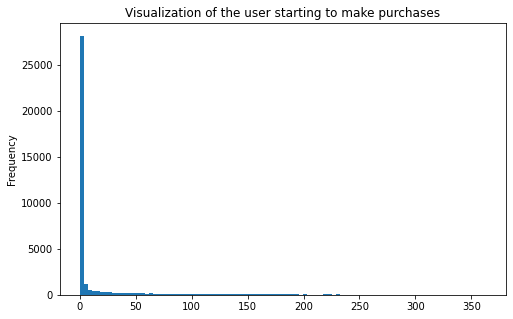

In [275]:
first_buy['days_to_first_pur'].plot(kind='hist', bins=100, figsize=(8,5))

plt.title('Visualization of the user starting to make purchases');

In [276]:
first_buy['days_to_first_pur'].value_counts()

0      25039
1       1966
2        685
3        452
4        386
       ...  
314        1
309        1
299        1
358        1
341        1
Name: days_to_first_pur, Length: 349, dtype: int64

* Kesimpulan awal 8
1. Dari 25039 user melakukan pembelian dari hari pertama session mereka 
2. 341 hari telah berlalu sampai user belum melakukan pembelian lagi

## Melakukan pengecekan pembelian yang di lakukan oleh user dilihat berdasarkan hari, bulan, tahun

In [277]:
d2_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [278]:
d2_orders['order_day'] = d2_orders['buy_ts'].astype('datetime64[D]')
d2_orders['order_week'] = d2_orders['buy_ts'].astype('datetime64[W]')
d2_orders['order_month'] = d2_orders['buy_ts'].astype('datetime64[M]')

In [279]:
d2_orders.head()

,buy_ts,revenue,uid,order_day,order_week,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


### Melakukan perhitungan pendapatan dari pembelian setiap user 

In [280]:
d2_orders_agg = d2_orders.groupby(['uid']).agg({
    'buy_ts': 'count',
    'revenue': 'sum'
})
d2_orders_agg.columns = ['count_transactions', 'sum_revenue']

d2_orders_agg

,count_transactions,sum_revenue
uid,,
313578113262317,1,0.55
1575281904278712,2,3.05
2429014661409475,1,73.33
2464366381792757,1,2.44
2551852515556206,2,10.99
...,...,...
18445147675727495770,1,3.05
18445407535914413204,3,0.88
18445601152732270159,1,4.22


In [281]:
d2_orders_agg.describe()

,count_transactions,sum_revenue
count,36523.000000,36523.000000
mean,1.380363,6.901328
std,3.454461,88.128535
min,1.000000,0.000000
25%,1.000000,1.470000
50%,1.000000,3.050000
75%,1.000000,5.800000
max,239.000000,11810.180000


### Melakukan analysis berdasarkan pendapatan yang di dapatkan di lihat dari uid

In [282]:
d2_orders_month_agg = d2_orders.groupby(['order_month']).agg({
    'buy_ts': 'count',
    'revenue': 'sum'
})
d2_orders_month_agg.columns = ['count_transactions', 'sum_revenue']

d2_orders_month_agg

,count_transactions,sum_revenue
order_month,,
2017-06-01,2354,9557.49
2017-07-01,2363,12539.47
2017-08-01,1807,8758.78
2017-09-01,3387,18345.51
2017-10-01,5679,27987.70
2017-11-01,5659,27069.93
2017-12-01,6218,36388.60
2018-01-01,4721,19417.13
2018-02-01,5281,25560.54


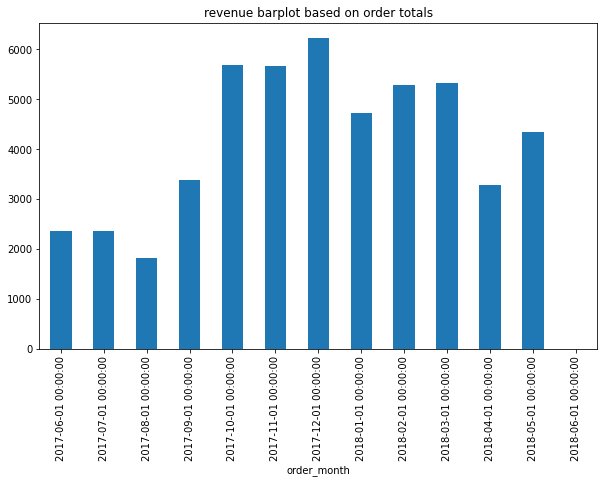

In [283]:
d2_orders_month_agg['count_transactions'].plot(kind='bar', figsize=(10,6))
plt.title('revenue barplot based on order totals');

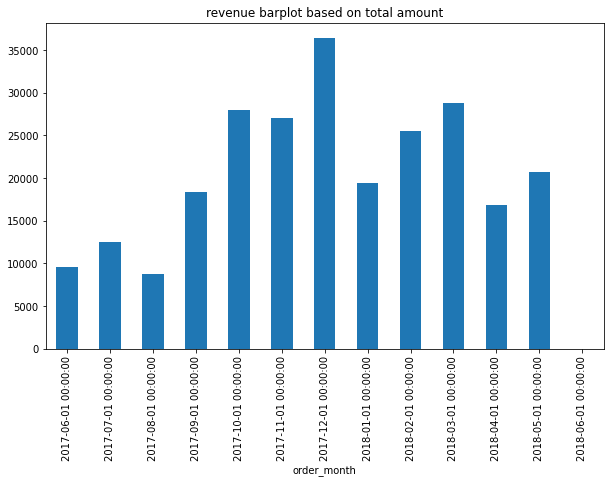

In [284]:
d2_orders_month_agg['sum_revenue'].plot(kind='bar', figsize=(10,6))
plt.title('revenue barplot based on total amount');

In [285]:
d2_orders_month_agg.describe()

,count_transactions,sum_revenue
count,13.000000,13.000000
mean,3878.076923,19389.015385
std,1858.113401,9962.071481
min,1.000000,3.420000
25%,2363.000000,12539.470000
50%,4346.000000,19417.130000
75%,5326.000000,27069.930000
max,6218.000000,36388.600000


### Perhitungan pendapatan rata rata 

In [286]:
print('Average purchase is $', round(d2_orders['revenue'].mean()))

Average purchase is $ 5


In [287]:
d2_orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

* Kesimpulan awal 9
1. Pembelian paling banyak terjadi pada bulan Desember 2017, sebanyak 6218 pembelian di lakukan dengan pendapatan mencapai 36,388 dollar
2. Pembelian berkurang pada bulan setelahnya di januari 2018 dengan jumlah pendapatan 19.417 dollar kemungkinan daya beli berkurang di karenakan waktnya liburan
3. Anomali paling mencolok adalah pendapatan bulan juni 2018 dimana hanya ada satu pembelian, kemungkinan besar data yang sudah tidak di berikan lagi
4. Banyak promo ahir tahun dimana bisa menjadi masukan kepada team marketing
5. Rata rata pembelian 5 dollar kemungkinan besar adalah promo product yang di tawarkan, menambah product adalah hal yang harus di perhitungkan 

### Melakukan perhitungan siklus hidup user (Life Time Value)

In [288]:
first_buy.head()

,uid,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date,first_order_ts,first_order_month,first_order_week,first_order_day,days_to_first_pur
0,313578113262317,2017-09-18 22:49:00,2017-01-01,2017-09-01,2017-09-14,2017-09-18,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03,107
1,1575281904278712,2017-06-03 10:13:00,2017-01-01,2017-06-01,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,0
2,2429014661409475,2017-10-11 17:14:00,2017-01-01,2017-10-01,2017-10-05,2017-10-11,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-01,2018-01-25,2018-01-27,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28,1
4,2551852515556206,2017-11-24 10:14:00,2017-01-01,2017-11-01,2017-11-23,2017-11-24,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24,0


In [289]:
cohort_sizes = first_buy.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [290]:
cohorts = pd.merge(d2_orders, first_buy, how='inner', on='uid')
cohorts_agg = cohorts.groupby(['first_order_month',
                               'order_month']).agg({'revenue':'sum'}).reset_index()

cohorts_agg

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


### Melakukan kalkulasi berdasarkan waktu pembelian sampai pembelian berikutnya

In [291]:
cohorts_agg['age_month'] = (cohorts_agg['order_month'] - cohorts_agg['first_order_month']).dt.days
cohorts_agg['age_month'] = round(cohorts_agg['age_month'] / 30,0).astype('int')
cohorts_agg.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

cohorts_agg

,first_order_month,order_month,revenue,age_month
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2
75,2018-04-01,2018-04-01,10600.69,0
76,2018-04-01,2018-05-01,1209.92,1
77,2018-05-01,2018-05-01,13925.76,0


In [292]:
cohorts_report = pd.merge(cohort_sizes, cohorts_agg, on='first_order_month')
cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
cohorts_report

,first_order_month,n_buyers,order_month,revenue,age_month,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


In [293]:
cohorts_ltv = cohorts_report.pivot_table(
    index='first_order_month', columns='age_month', values='ltv', aggfunc='sum').cumsum(axis=1)

In [294]:
cohorts_ltv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


In [295]:
cohorts_ltv.describe()

age_month,0,1,2,3,4,5,6,7,8,9,10,11
count,13.000000,11.000000,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000
mean,4.801682,5.395666,5.821811,6.689763,7.298634,7.969053,8.387686,9.083583,10.062084,9.251340,10.004616,11.879234
std,0.669714,0.713722,0.861552,1.939974,1.982234,2.067443,2.520771,2.644782,2.489989,1.563286,2.287861,NaN
min,3.420000,4.430394,4.513777,4.587921,4.940151,6.159956,6.244772,6.360242,8.084035,8.231180,8.386854,11.879234
25%,4.657597,5.069130,5.503285,5.888035,6.179726,6.828089,6.693064,7.922803,8.233817,8.351452,9.195735,11.879234
50%,4.738191,5.209743,5.742181,6.598270,7.197094,7.639913,7.683754,7.991533,9.364537,8.471723,10.004616,11.879234
75%,5.154683,5.651213,6.136160,6.988937,7.534691,8.010429,8.928139,9.892116,11.192803,9.761420,10.813497,11.879234
max,6.010218,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,11.051117,11.622378,11.879234


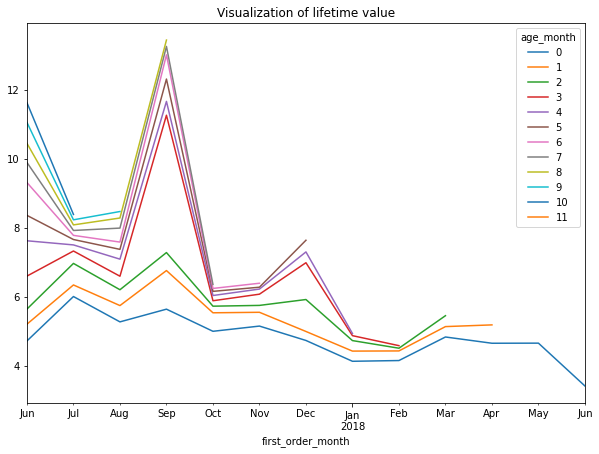

In [296]:
cohorts_ltv.plot(figsize=(10,7))
plt.title('Visualization of lifetime value');

* Kesimpulan awal 10
1. Data yang di hasilkan untuk memperlihatkan LTV terbilang bagus, akan tetapi tetap ada anomali yang di sebabkan dataset yang tidak menyeluruh
2. Pendapatan yang meningkat tajam pada bulan september bisa di bilang merupakan pelanggan tetap yang memang menunggu produk Y.Afisha
3. Hampir semua user merupakan pelanggan tetap 
4. Menambah product dan promo, adalah hal yang perlu di pertimbangkan selalu


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Melakukan perhitungan terhadap pengeluaran Y.Afisha 

In [297]:
d1_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [298]:
print('Total costs spend for the entire period was USD',d1_costs['costs'].sum())

Total costs spend for the entire period was USD 329131.62


### Melakukan pengecekan pengeluaran yang di lakukan dari sumber yang berbeda beda

In [299]:
cek_source = d1_costs.groupby('source_id').sum()['costs'].reset_index().sort_values('costs', ascending=False).reset_index()
cek_source

,index,source_id,costs
0,2,3,141321.63
1,3,4,61073.60
2,4,5,51757.10
3,1,2,42806.04
4,0,1,20833.27
5,6,10,5822.49
6,5,9,5517.49


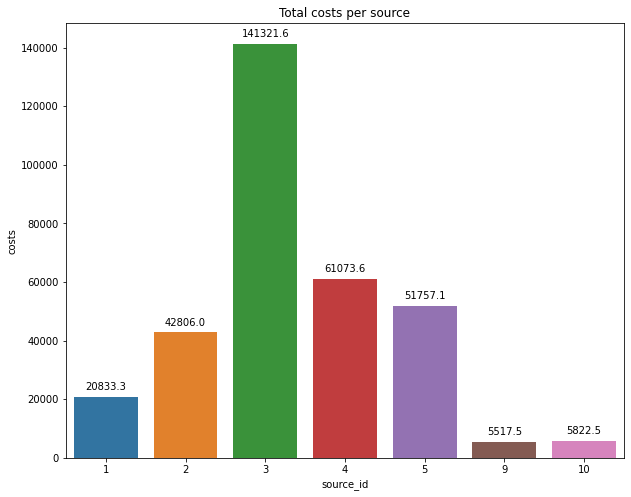

In [300]:
plt.figure(figsize=(10,8))
splot = sns.barplot(data=cek_source, x='source_id', y='costs')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0,10),
                   textcoords = 'offset points')
plt.xticks
plt.title('Total costs per source')
plt.show();

### Melakukan pengecekan pengeluaran dengan hitungan bulan

In [301]:
d1_costs['dt_month'] = d1_costs['dt'].astype('datetime64[M]')
d1_costs.head()

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [302]:
cek_month = d1_costs.groupby(['dt_month']).sum()['costs'].reset_index()
cek_month

,dt_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


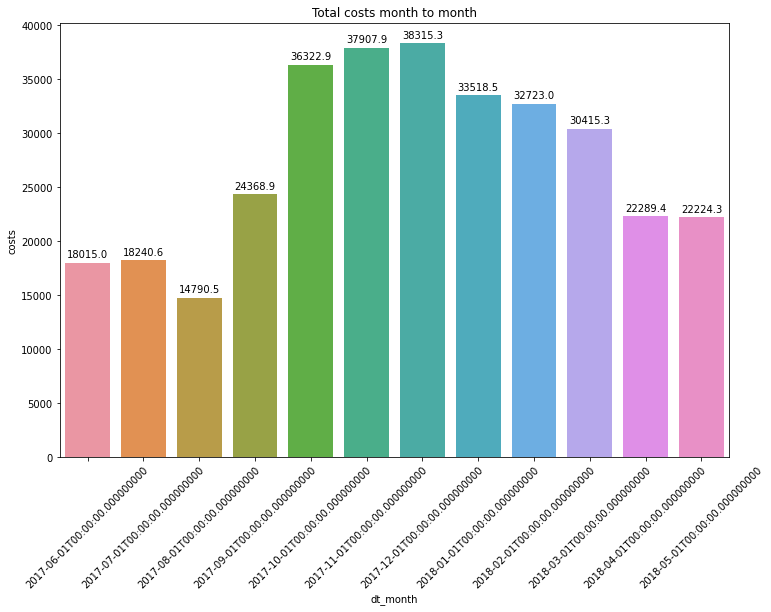

In [303]:
plt.figure(figsize=(12,8))
splot = sns.barplot(data=cek_month, x='dt_month', y='costs')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 8),
                   textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.title('Total costs month to month')
plt.show();

* Kesimpulan awal 11
1. Pengeluaran paling dapat dilihat di mulai dari bulan 9, 10, 11. hal ini membenarkan adanya promo yang di keluarkan 


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Analisis CAC (Customer Acuisition Cost)

In [304]:
d3_visits.head()

,device,end_ts,source_id,start_ts,uid,date,dow,session_duration_sec,daily,weekly,monthly,yearly
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,0,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,5,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,6,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2,0,2017-12-27,2017-12-21,2017-12-01,2017-01-01


In [305]:
total_visits = d3_visits.groupby('source_id').count()['uid'].reset_index()
total_visits

,source_id,uid
0,1,34121
1,2,47626
2,3,85610
3,4,101794
4,5,66905
5,6,6
6,7,36
7,9,13277
8,10,10025


In [306]:
total_costs = d1_costs.groupby('source_id').sum()['costs'].reset_index()
total_costs

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [307]:
total_visits = total_visits.merge(total_costs, how='left', on='source_id')
total_visits['CAC'] = total_visits['costs'] / total_visits['uid']

In [308]:
total_visits

,source_id,uid,costs,CAC
0,1,34121,20833.27,0.610570
1,2,47626,42806.04,0.898796
2,3,85610,141321.63,1.650761
3,4,101794,61073.60,0.599972
4,5,66905,51757.10,0.773591
5,6,6,NaN,NaN
6,7,36,NaN,NaN
7,9,13277,5517.49,0.415568
8,10,10025,5822.49,0.580797


In [309]:
total_visits.sort_values('CAC', ascending=True)

,source_id,uid,costs,CAC
7,9,13277,5517.49,0.415568
8,10,10025,5822.49,0.580797
3,4,101794,61073.60,0.599972
0,1,34121,20833.27,0.610570
4,5,66905,51757.10,0.773591
1,2,47626,42806.04,0.898796
2,3,85610,141321.63,1.650761
5,6,6,NaN,NaN
6,7,36,NaN,NaN


* Kesimpulan awal 11
1. Sumber iklan yang paling kecil menghabiskan biaya adalah iklan nomor 9 dengan total biaya 5517.49 dollar, dan dari iklan tersebut kita mendapatkan user yang visit pada produk kita sebanyak 363 user, yang artinya biaya akuisisi untuk setiap user ini sebesar 15.19 dollar dari setiap user

## Analisis investasi ROI (Return Of Invenstment)

In [310]:
d3_visits.head()

,device,end_ts,source_id,start_ts,uid,date,dow,session_duration_sec,daily,weekly,monthly,yearly
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,0,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,5,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,6,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2,0,2017-12-27,2017-12-21,2017-12-01,2017-01-01


In [311]:
d2_orders.head()

,buy_ts,revenue,uid,order_day,order_week,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [312]:
d3_visits['end_date'] = d3_visits['end_ts'].dt.date
d3_visits.head()

,device,end_ts,source_id,start_ts,uid,date,dow,session_duration_sec,daily,weekly,monthly,yearly,end_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,0,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,5,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,6,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2,0,2017-12-27,2017-12-21,2017-12-01,2017-01-01,2017-12-27


In [313]:
d3_visits = d3_visits.rename(columns={"daily": "start_date"})
d3_visits.head() 

,device,end_ts,source_id,start_ts,uid,date,dow,session_duration_sec,start_date,weekly,monthly,yearly,end_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,0,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,5,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,6,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2,0,2017-12-27,2017-12-21,2017-12-01,2017-01-01,2017-12-27


In [314]:
d3_visits.shape, d2_orders.shape

((359400, 13), (50415, 6))

### Penggabungan table untuk mempermudah analisis ROI

In [317]:
visits_orders = d2_orders.merge(d3_visits, how='left', left_on=['uid', 'order_day'], right_on=['uid', 'start_date'])
visits_orders.shape

(63683, 18)

In [319]:
visits_orders.head()

,buy_ts,revenue,uid,order_day,order_week,order_month,device,end_ts,source_id,start_ts,date,dow,session_duration_sec,start_date,weekly,monthly,yearly,end_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1.0,2017-06-01 00:09:00,2017-06-01,3.0,120.0,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,desktop,2017-06-01 00:25:00,2.0,2017-06-01 00:14:00,2017-06-01,3.0,660.0,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,desktop,2017-06-01 00:34:00,2.0,2017-06-01 00:25:00,2017-06-01,3.0,540.0,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,desktop,2017-06-01 00:33:00,2.0,2017-06-01 00:14:00,2017-06-01,3.0,1140.0,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,desktop,2017-06-01 07:59:00,3.0,2017-06-01 07:31:00,2017-06-01,3.0,1680.0,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01


In [320]:
# Filter data berdasarkan anomali yang terjadi pada pembelian yang berlangsung

visits_orders = visits_orders.loc[(visits_orders['buy_ts'] >= visits_orders['start_ts']) & (
    visits_orders['buy_ts'] <= visits_orders['end_ts'])]
visits_orders.shape

(35742, 18)

In [322]:
total_income = visits_orders.groupby('source_id').sum()['revenue'].reset_index()
total_income

,source_id,revenue
0,1.0,28595.14
1,2.0,33517.50
2,3.0,30276.50
3,4.0,34390.76
4,5.0,33581.31
5,7.0,1.22
6,9.0,2746.67
7,10.0,3079.24


In [323]:
total_visits = total_visits.merge(total_income, how='left', on='source_id')
total_visits

,source_id,uid,costs,CAC,revenue
0,1,34121,20833.27,0.610570,28595.14
1,2,47626,42806.04,0.898796,33517.50
2,3,85610,141321.63,1.650761,30276.50
3,4,101794,61073.60,0.599972,34390.76
4,5,66905,51757.10,0.773591,33581.31
5,6,6,NaN,NaN,NaN
6,7,36,NaN,NaN,1.22
7,9,13277,5517.49,0.415568,2746.67
8,10,10025,5822.49,0.580797,3079.24


### Melakukan perhitungan ROI

In [324]:
total_visits['ROI'] = total_visits['revenue'] / total_visits['costs']

In [325]:
total_visits.sort_values('ROI', ascending=False)

,source_id,uid,costs,CAC,revenue,ROI
0,1,34121,20833.27,0.610570,28595.14,1.372571
1,2,47626,42806.04,0.898796,33517.50,0.783009
4,5,66905,51757.10,0.773591,33581.31,0.648825
3,4,101794,61073.60,0.599972,34390.76,0.563104
8,10,10025,5822.49,0.580797,3079.24,0.528853
7,9,13277,5517.49,0.415568,2746.67,0.497812
2,3,85610,141321.63,1.650761,30276.50,0.214238
5,6,6,NaN,NaN,NaN,NaN
6,7,36,NaN,NaN,1.22,NaN


* Kesimpulan awal 11
1. Terdapat 1 source_id yang memiliki ROI paling banyak
2. costs untuk promo tidak selalu memberikan ROI yang kemungkinan sangat di inginkan dilihat dari bulan 9,10,11 dimana penjualan paling banyak


## Kesimpulan 

### Mengenai Product

- Penggunaan produk yang di sediakan oleh Y.Afhisa memiliki user yang kembali berdatangan sepanjang tahun 2017 - 2018 sesuai data yang di sediakan. 
- Perhari 907, perminggu 5724, per bulan 23228.
- Bisa di simpulkan kebanyakan dari user mempunyai kecenderungan untuk kembali.
- User lebih banyak menggunakan desktop untuk pembelian product dari website Y.Afisha.
- rata2 user hanya melakukan 1-2 sesi pada setiap harinya, namun dengan rata2 durasi 10 menit bisa kita manfaatkan untuk menarik lebih banyak user yang akan membeli produk di Y.Afisha.
- Rata rata user kembali untuk melakukan pengecekan product Y.Afhisha, dalam jangka waktu sebulan adalah 5 %.
- Bulan september 2017 merupakan hari dimana user yang kembali mencapai 7.4 %.
- Cohort untuk retensi user terlihat menjanjikan dengan beberapa user yang kembali dalam jangka waktu 6 bulan.


### Detail Revenue
- Pembelian yang di lakukan oleh user dimana menjadi pemasukan untuk Y.Afhisa adalah 5 dollar
- pada period 2017-2018 ada sabanyak 2878 orderan, dan mendapatkan pendapatan sebanyak 19.389 dolar.
- Puncah penjualan terjadi pada bulan Desember yang mencapai  6218
- Dilihat dari kohort LTV yang kita punya, secara rata-rata setiap pelanggan berkontribusi atas pendapatan sebesar 11.87 dolar dalam periode 2017-2018 tersebut.
- Kebanyakan user melakukan pembelian pada hari pertama mereka mengunjungi situs Y.Afhisa

### Marketing dan rekomendasi
- Biaya yang di habiskan sebanyak 329131.62 dolar
- Source_id no 9, 10, dan 4 merupakan merupakan corong budget CAC yang paling rendah. 
- Source_id 3 adalah yang paling mahal yaitu 389 dolar/user dolar/user dengan jumlah akuisisi 363 user. lebih baik corong dengan sumber ini di hentikan.
- Membuat notifikasi dan email pada kedua device dimana mengajak user membukan kembali website untuk penawaran Y. Afhisa
- Membuat acara seperti jualan online live yang mengundang user untuk mengunjungi website
- Melakukan hal yang sama terhadap cara merketing pada bulan december 2017 dan january 2018. Memang masa liburan atau konversi pembelian paling banyak pada bulan tersebut, akan tetapi memberikan Revenue yang bagus untuk kemajuan Y. Afhisa

# Sekian 

# Terima Kasih